# Assignment 7 Webscraping

## Part 1

* You must first retrieve the top 100 scoring posts from [https://old.reddit.com/top/?sort=top&t=all](https://old.reddit.com/top/?sort=top&t=all). You will need to walk through multiple pages, using the `next` button.
* Save the links in a list of `Post` objects. The `Post` object must contain:
    * The id of the post.
    * The title of the post.
    * The exact score of the post.
    * The subreddit the post was submitted to. 

## Part 2

What are the most popular subreddits in the top 100 posts?

* Find the frequency of all the subreddits in the 100 top posts. Store them in a dictionary where `subreddit=>frequency`.
* Sort the dictionary by descending value. 
* Plot the frequencies on a bar chart, where the `y`-axis is the frequency, and the `x`-axis is the subreddit name.

## Part 3

Search reddit using selenium.

Create a function that can retrieve the top `n` search results (posts) given a `search_term`.

```python
def search_reddit(search_term, n):
   pass
```

*remember to use `old.reddit.com` to aviod SPA.*

If you get stuck, you can check out our solution [here](https://github.com/Thomas-Rosenkrans-Vestergaard/thomas-kristoffer-assignment-solution).

## Part 1

In [2]:
#Open browser and find desired html content 

from selenium import webdriver
from pprint import pprint as pp

html_posts = []

#opening the browser
url = 'https://old.reddit.com'
browser = webdriver.Chrome()
browser.get(url)
#navigate to top posts
browser.find_element_by_link_text("top").click()

#finding the source of the posts
for _ in range(4):
    html_posts_container = browser.find_element_by_id("siteTable")
    html_cur_page_posts = html_posts_container.find_elements_by_class_name("thing")
    html_posts += [e.get_attribute('innerHTML') for e in html_cur_page_posts]
    browser.find_element_by_link_text("next ›").click()

#closes the browser
browser.quit()

In [3]:
#Make HTML into list of dictionaries containing desired information

import bs4
posts_dicts = []    
    
for e in html_posts:
    soup = bs4.BeautifulSoup(e, 'html.parser')
    
    title = soup.select("a.title")[0].getText().strip()
    subreddit = soup.select("a.subreddit")[0].getText().strip()
    votes = soup.select("div.unvoted.score")[0]['title']
    rank = soup.select("span.rank")[0].getText().strip()
    
    posts_dicts.append({
        "title": title,
        "subreddit": subreddit,
        "votes": int(votes), 
        "rank": int(rank)
    })

## Part 2

In [4]:
#Make sorted list of tuples with subreddit,frequency

#making a dictionary with key=sub and value=frequency
from collections import defaultdict
sub_frequency = defaultdict(lambda:0)

for e in posts_dicts:
    sub_frequency[e["subreddit"]] += 1

#converting the dictionary to a list of tuples
sub_frequency_list = list(sub_frequency.items())
#sorting the list by frequency
sub_frequency_list.sort(key= lambda x : x[-1], reverse=True)

pp(sub_frequency_list[:10])

[('r/funny', 7),
 ('r/PewdiepieSubmissions', 7),
 ('r/gaming', 5),
 ('r/aww', 5),
 ('r/pics', 4),
 ('r/politics', 4),
 ('r/todayilearned', 3),
 ('r/WhitePeopleTwitter', 3),
 ('r/interestingasfuck', 2),
 ('r/Wellthatsucks', 2)]


<IPython.core.display.Javascript object>


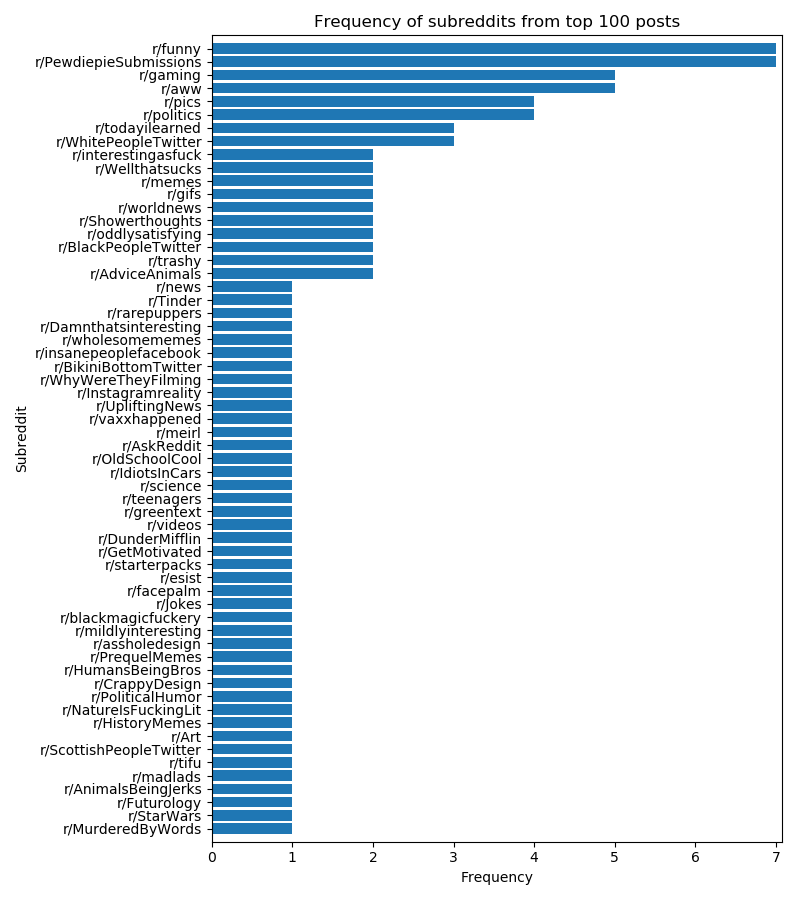

In [5]:
# Making barhplot

%matplotlib notebook
import matplotlib.pyplot as plt

subs = [e[0] for e in reversed(sub_frequency_list)]
frequency = [e[1] for e in reversed(sub_frequency_list)]

plt.figure(figsize=(8,9))
plt.barh(subs, frequency, orientation="horizontal")
plt.title("Frequency of subreddits from top 100 posts", fontsize=12)
plt.ylabel("Subreddit")
plt.xlabel("Frequency")
plt.margins(0.01)
plt.tight_layout()

#We desided to make a horizontal bar plot with subs on the y-axis and frequency on the x-axis 

## Part 3